In [1]:
import tensorflow as tf

x1 = tf.constant([1, 2, 3, 4])
x2 = tf.constant([5, 6, 7 , 8])

result = tf.multiply(x1, x2)

print(result)

Tensor("Mul:0", shape=(4,), dtype=int32)


In [2]:
import os
import skimage

def load_data(data_directory):
    directories = [d for d in os.listdir(data_directory) 
                   if os.path.isdir(os.path.join(data_directory, d))]
    labels = []
    images = []
    for d in directories:
        label_directory = os.path.join(data_directory, d)
        file_names = [os.path.join(label_directory, f) 
                      for f in os.listdir(label_directory) 
                      if f.endswith(".ppm")]
        for f in file_names:
            images.append(skimage.data.imread(f))
            labels.append(int(d))
    return images, labels

ROOT_PATH = "/home/fiorentina/Dokumente"
train_data_directory = os.path.join(ROOT_PATH, "TrafficSigns/Training")
test_data_directory = os.path.join(ROOT_PATH, "TrafficSigns/Testing")

images, labels = load_data(train_data_directory)

In [3]:
import numpy as np

In [4]:
img_array = np.array(images)
label_ar = np.array(labels)

In [5]:
print(img_array.ndim)
    
print(img_array.size)

print(img_array[0])

1
4575
[[[58 49 48]
  [59 50 50]
  [59 50 51]
  ...
  [65 51 51]
  [64 49 50]
  [65 49 51]]

 [[58 49 48]
  [58 50 50]
  [59 51 51]
  ...
  [66 52 52]
  [64 50 51]
  [64 49 50]]

 [[57 48 48]
  [58 50 49]
  [59 51 51]
  ...
  [67 53 53]
  [64 50 50]
  [62 49 49]]

 ...

 [[36 25 28]
  [37 25 27]
  [38 25 27]
  ...
  [44 34 32]
  [43 34 33]
  [43 35 33]]

 [[36 25 28]
  [37 25 27]
  [38 25 27]
  ...
  [43 33 32]
  [43 34 32]
  [43 35 33]]

 [[36 25 28]
  [37 25 27]
  [38 25 27]
  ...
  [44 34 32]
  [44 35 33]
  [45 37 35]]]


In [6]:
print(label_ar.ndim)

print(label_ar.size)

print(label_ar[0])

1
4575
29


In [7]:
print(label_ar.flags)

print(label_ar.nbytes)

print(label_ar.itemsize)

  C_CONTIGUOUS : True
  F_CONTIGUOUS : True
  OWNDATA : True
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False
  UPDATEIFCOPY : False
36600
8


In [8]:
print(img_array.flags)

print(img_array.nbytes)

print(img_array.itemsize)

  C_CONTIGUOUS : True
  F_CONTIGUOUS : True
  OWNDATA : True
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False
  UPDATEIFCOPY : False
36600
8


In [9]:
import matplotlib.pyplot as plt

plt.hist(labels, 62)

plt.show();

<Figure size 640x480 with 1 Axes>

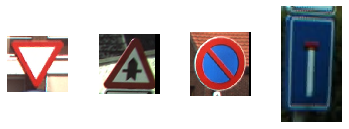

In [10]:
sign_index = [300, 2250, 3650, 4000]

for i in range(len(sign_index)):
    plt.subplot(1, 4, i+1)
    plt.axis('off')
    plt.imshow(images[sign_index[i]])
    plt.subplots_adjust(wspace=0.5)

plt.show();

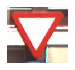

shape: (100, 109, 3), min: 11, max: 255


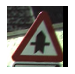

shape: (123, 124, 3), min: 0, max: 255


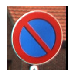

shape: (146, 140, 3), min: 0, max: 255


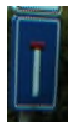

shape: (93, 49, 3), min: 0, max: 253


In [11]:
sign_index = [300, 2250, 3650, 4000]

for i in range(len(sign_index)):
    plt.subplot(1, 4, i+1)
    plt.axis('off')
    plt.imshow(images[sign_index[i]])
    plt.subplots_adjust(wspace=0.5)
    plt.show();
    print("shape: {0}, min: {1}, max: {2}".format(images[sign_index[i]].shape, 
                                                  images[sign_index[i]].min(), 
                                                  images[sign_index[i]].max()))

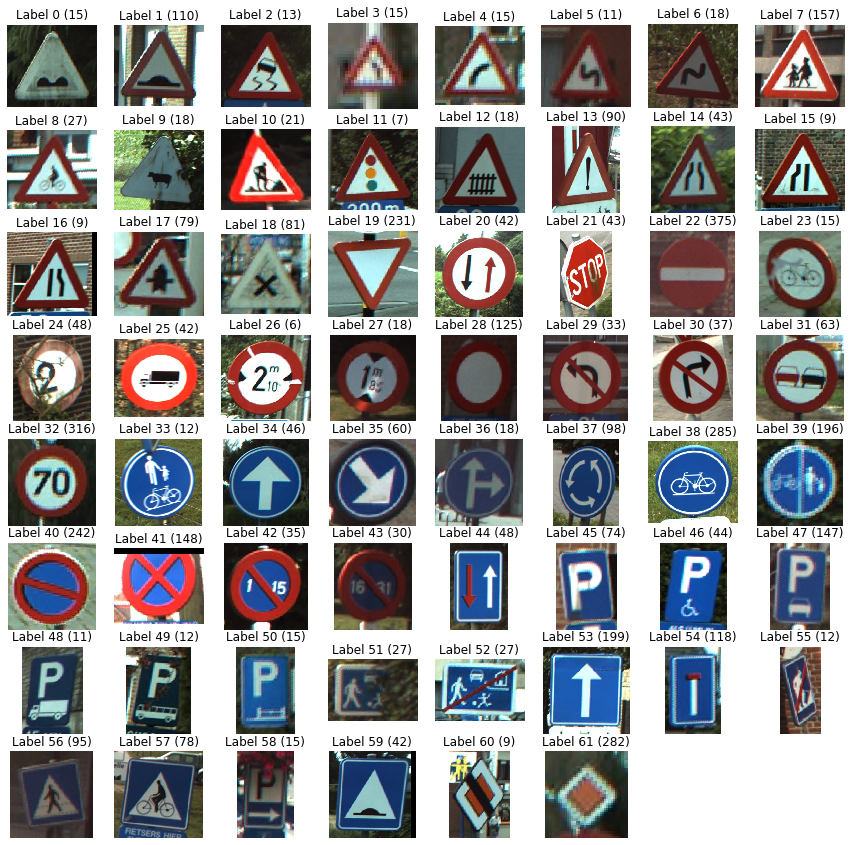

In [12]:
import matplotlib.pyplot as plt 

# Get the unique labels 
unique_labels = set(labels)

# Initialize the figure
plt.figure(figsize=(15, 15))

# Set a counter
i = 1

# For each unique label,
for label in unique_labels:
    # You pick the first image for each label
    image = images[labels.index(label)]
    # Define 64 subplots 
    plt.subplot(8, 8, i)
    # Don't include axes
    plt.axis('off')
    # Add a title to each subplot 
    plt.title("Label {0} ({1})".format(label, labels.count(label)))
    # Add 1 to the counter
    i += 1
    # And you plot this first image 
    plt.imshow(image)
    
# Show the plot
plt.show()

In [13]:
#resizing the images
from skimage import transform

images28 = [transform.resize(image, (28, 28)) for image in images]

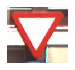

shape: (28, 28, 3), min: 0.13746498599439774, max: 1.0


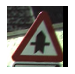

shape: (28, 28, 3), min: 0.0, max: 0.996078431372549


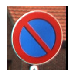

shape: (28, 28, 3), min: 0.011624649859944628, max: 0.9415966386554621


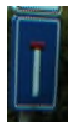

shape: (28, 28, 3), min: 0.0016018907563024917, max: 0.7288427871148471


In [14]:
#checking the result
sign_index = [300, 2250, 3650, 4000]

for i in range(len(sign_index)):
    plt.subplot(1, 4, i+1)
    plt.axis('off')
    plt.imshow(images[sign_index[i]])
    plt.subplots_adjust(wspace=0.5)
    plt.show();
    print("shape: {0}, min: {1}, max: {2}".format(images28[sign_index[i]].shape, 
                                                  images28[sign_index[i]].min(), 
                                                  images28[sign_index[i]].max()))

In [15]:
#converting all images to grayscale
from skimage.color import rgb2gray

images28 = np.array(images28)

images28 = rgb2gray(images28)



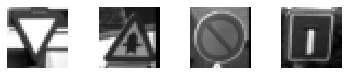

In [16]:
#plotting the grayscale images

import matplotlib.pyplot as plt

traffic_signs = [300, 2250, 3650, 4000]

for i in range(len(traffic_signs)):
    plt.subplot(1, 4, i+1)
    plt.axis('off')
    plt.imshow(images28[traffic_signs[i]], cmap="gray")
    plt.subplots_adjust(wspace=0.5)
    
# Show the plot
plt.show()

In [17]:
# Initialize placeholders 
x = tf.placeholder(dtype = tf.float32, shape = [None, 28, 28])
y = tf.placeholder(dtype = tf.int32, shape = [None])

# Flatten the input data
images_flat = tf.contrib.layers.flatten(x)

# Fully connected layer 
logits = tf.contrib.layers.fully_connected(images_flat, 62, tf.nn.relu)

# Define a loss function
loss = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(labels = y, 
                                                                    logits = logits))
# Define an optimizer 
train_op = tf.train.AdamOptimizer(learning_rate=0.001).minimize(loss)

# Convert logits to label indexes
correct_pred = tf.argmax(logits, 1)

# Define an accuracy metric
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

W0711 22:13:46.260406 139947448862528 lazy_loader.py:50] 
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

W0711 22:13:46.261960 139947448862528 deprecation.py:323] From /home/fiorentina/.local/share/virtualenvs/jp-notebooks-y6laCnYE/lib/python3.6/site-packages/tensorflow/contrib/layers/python/layers/layers.py:1634: flatten (from tensorflow.python.layers.core) is deprecated and will be removed in a future version.
Instructions for updating:
Use keras.layers.flatten instead.


In [18]:
#print out most of the values

print("images_flat: ", images_flat)
print("logits: ", logits)
print("loss: ", loss)
print("predicted_labels: ", correct_pred)

images_flat:  Tensor("Flatten/flatten/Reshape:0", shape=(?, 784), dtype=float32)
logits:  Tensor("fully_connected/Relu:0", shape=(?, 62), dtype=float32)
loss:  Tensor("Mean:0", shape=(), dtype=float32)
predicted_labels:  Tensor("ArgMax:0", shape=(?,), dtype=int64)


In [24]:
#once the NN has been built, ywe can train it

tf.set_random_seed(1234)
sess = tf.Session()

sess.run(tf.global_variables_initializer())

for i in range(201):
        print('EPOCH', i)
        _, accuracy_val = sess.run([train_op, accuracy], feed_dict={x: images28, y: labels})
        if i % 10 == 0:
            print("Loss: ", loss)
        print('DONE WITH EPOCH')

EPOCH 0
Loss:  Tensor("Mean:0", shape=(), dtype=float32)
DONE WITH EPOCH
EPOCH 1
DONE WITH EPOCH
EPOCH 2
DONE WITH EPOCH
EPOCH 3
DONE WITH EPOCH
EPOCH 4
DONE WITH EPOCH
EPOCH 5
DONE WITH EPOCH
EPOCH 6
DONE WITH EPOCH
EPOCH 7
DONE WITH EPOCH
EPOCH 8
DONE WITH EPOCH
EPOCH 9
DONE WITH EPOCH
EPOCH 10
Loss:  Tensor("Mean:0", shape=(), dtype=float32)
DONE WITH EPOCH
EPOCH 11
DONE WITH EPOCH
EPOCH 12
DONE WITH EPOCH
EPOCH 13
DONE WITH EPOCH
EPOCH 14
DONE WITH EPOCH
EPOCH 15
DONE WITH EPOCH
EPOCH 16
DONE WITH EPOCH
EPOCH 17
DONE WITH EPOCH
EPOCH 18
DONE WITH EPOCH
EPOCH 19
DONE WITH EPOCH
EPOCH 20
Loss:  Tensor("Mean:0", shape=(), dtype=float32)
DONE WITH EPOCH
EPOCH 21
DONE WITH EPOCH
EPOCH 22
DONE WITH EPOCH
EPOCH 23
DONE WITH EPOCH
EPOCH 24
DONE WITH EPOCH
EPOCH 25
DONE WITH EPOCH
EPOCH 26
DONE WITH EPOCH
EPOCH 27
DONE WITH EPOCH
EPOCH 28
DONE WITH EPOCH
EPOCH 29
DONE WITH EPOCH
EPOCH 30
Loss:  Tensor("Mean:0", shape=(), dtype=float32)
DONE WITH EPOCH
EPOCH 31
DONE WITH EPOCH
EPOCH 32
DONE 

[1, 31, 61, 61, 32, 53, 47, 56, 61, 38]
[ 1 32 61 61 32 53 47 56 32 38]


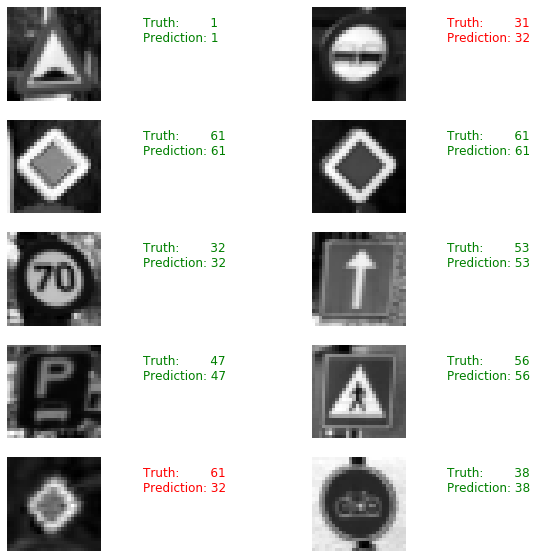

In [25]:
#let us see if our NN is meaningful

import matplotlib.pyplot as plt
import random

# Pick 10 random images
sample_indexes = random.sample(range(len(images28)), 10)
sample_images = [images28[i] for i in sample_indexes]
sample_labels = [labels[i] for i in sample_indexes]

# Run the "correct_pred" operation
predicted = sess.run([correct_pred], feed_dict={x: sample_images})[0]
                        
# Print the real and predicted labels
print(sample_labels)
print(predicted)

# Display the predictions and the ground truth visually.
fig = plt.figure(figsize=(10, 10))
for i in range(len(sample_images)):
    truth = sample_labels[i]
    prediction = predicted[i]
    plt.subplot(5, 2,1+i)
    plt.axis('off')
    color='green' if truth == prediction else 'red'
    plt.text(40, 10, "Truth:        {0}\nPrediction: {1}".format(truth, prediction), 
             fontsize=12, color=color)
    plt.imshow(sample_images[i],  cmap="gray")

plt.show()

In [22]:
sess.close()

In [26]:
from skimage import transform

# Load the test data
test_images, test_labels = load_data(test_data_directory)

# Transform the images to 28 by 28 pixels
test_images28 = [transform.resize(image, (28, 28)) for image in test_images]

# Convert to grayscale
from skimage.color import rgb2gray
test_images28 = rgb2gray(np.array(test_images28))

# Run predictions against the full test set.
predicted = sess.run([correct_pred], feed_dict={x: test_images28})[0]

# Calculate correct matches 
match_count = sum([int(y == y_) for y, y_ in zip(test_labels, predicted)])

# Calculate the accuracy
accuracy = match_count / len(test_labels)

# Print the accuracy
print("Accuracy: {:.3f}".format(accuracy))

Accuracy: 0.627


In [27]:
sess.close()